In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Procedemos a unir los dos DF y revisarlos

In [2]:
df_flight_activity = pd.read_csv('Customer Flight Activity Clean.csv')
df_loyalty_history = pd.read_csv('Customer Loyalty History Clean.csv')

In [3]:
#Quiero ver todas las columnas
pd.set_option('display.max_columns', None) 

In [9]:
# Por columnas: usaremos un merge (por defecto es un inner join), para conservar solo los clientes que están en ambos CSV
# Común: Loyalty Number

df_completo = df_flight_activity.merge(df_loyalty_history, on=["loyalty_number"])
df_completo.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203,0,0,Ontario,Toronto,M1R 4K3,Male,College,79422,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79422,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1,0,0


In [ ]:
REDACTAR

In [10]:
df_completo['date'] = pd.to_datetime(df_completo[['year', 'month']].assign(DAY=1))

# Eliminar Year y Month
df_completo = df_completo.drop(columns=['year', 'month'])

# Mover Date a la segunda posición (índice 1)
date_col = df_completo.pop('date')      # Saca la columna Date
df_completo.insert(1, 'date', date_col) 

In [14]:
# Ahora modifico el nombre de las columnas que modifiqué anteriormente ya que he completado el análisis
df_completo.columns = df_completo.columns.str.replace('_', ' ').str.title()

In [12]:
# Guardo en un nuevo CSV

df_completo.to_csv('Customer Flight Activity & Loyalty History.csv', index=False)

In [15]:
df_completo

,Loyalty Number,Date,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017-01-01,3,0,3,1521,152,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017-01-01,10,4,14,2030,203,0,0,Ontario,Toronto,M1R 4K3,Male,College,79422,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017-01-01,6,0,6,1200,120,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79422,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017-01-01,0,0,0,0,0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017-01-01,0,0,0,0,0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018-12-01,0,0,0,0,0,0,0,Ontario,Toronto,M1R 4K3,Male,College,79422,Married,Aurora,7290.07,Standard,2014,5,0,0
403756,999911,2018-12-01,0,0,0,0,0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943,Single,Nova,8564.77,Standard,2012,8,0,0
403757,999940,2018-12-01,3,0,3,1233,123,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670,Married,Nova,20266.50,Standard,2017,7,0,0
403758,999982,2018-12-01,0,0,0,0,0,0,0,British Columbia,Victoria,V10 6T5,Male,College,79422,Married,Star,2631.56,Standard,2018,7,0,0


---------------

-- FASE 2

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [38]:
# elimino warnings que afectan para paletas que quedaron anticuadas y que no me aparezca texto encima del gráfico

import warnings
warnings.filterwarnings("ignore")

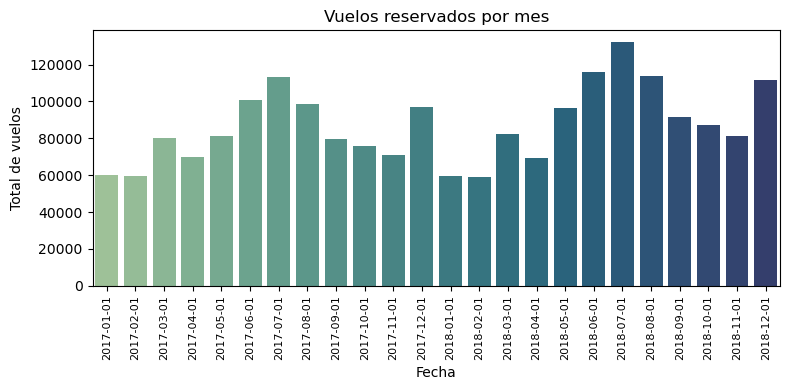

In [59]:
# Necesito las variables: Total Flights, Date 
# 2 variables, utilizo Barplot -> Nos sirve para resumir el grupo y ver las diferencias frente a esa variable.

# Primero agrupo por fechas Y el total de vuelos
vuelos_mes = df_completo.groupby('Date')['Total Flights'].sum().reset_index()

# Al haber convertido a dateframe, necesito usar ".dt.to_period('M')"" para agrupar por mes
df_barplot = df_completo.groupby(df_completo['Date'].dt.to_period('M'))['Total Flights'].sum().reset_index()

# Revertimos el period a dataframe utilizando "to_timestamp"
df_barplot['Date'] = df_barplot['Date'].dt.to_timestamp()

# Creamos gráfica:

plt.figure(figsize=(8,4))

sns.barplot(x = 'Date', 
            y = 'Total Flights', 
            data = df_barplot, 
            palette = "crest") 

plt.title('Vuelos reservados por mes')
plt.xlabel('Fecha')
plt.ylabel('Total de vuelos')

plt.xticks(rotation=90, fontsize=8) #para que no me salga el texto pisado, así lo dobla
plt.tight_layout() #lo empequeñece


Observamos una gráfica de barras donde encontramos por orden de fecha hacia la más reciente (Eje x), y el total de vuelos (Eje y).
- Podemos ver una tendencia ascendente, especialmente en el año 2017.
- La distribución coincide con el contexto turístico y las temporadas (incremento en temporada alta), especialmente en julio. Alcanzando el máximo en julio 2018 (superando los 120 000 vuelos en julio, el doble que en los meses de temporada baja).
- La temporada baja coincide en ambos años para los meses de enero y febrero, aproximadamente 60 000 vuelos por mes. Observamos un leve descenso en abril, probablemente por la falta de vacaciones/trabajo, o el aumento del precio de vuelos debido a festividades en algunas regiones y Semana Santa. 
- También observamos un pico en diciembre, probablemente para navidades y festividades (vuelta a casa, vacaciones). 

Como idea para la compañía podrían realizar promociones en los meses de menos demanda, ofertar paquetes turísticos para los meses de temporada baja

----------------

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


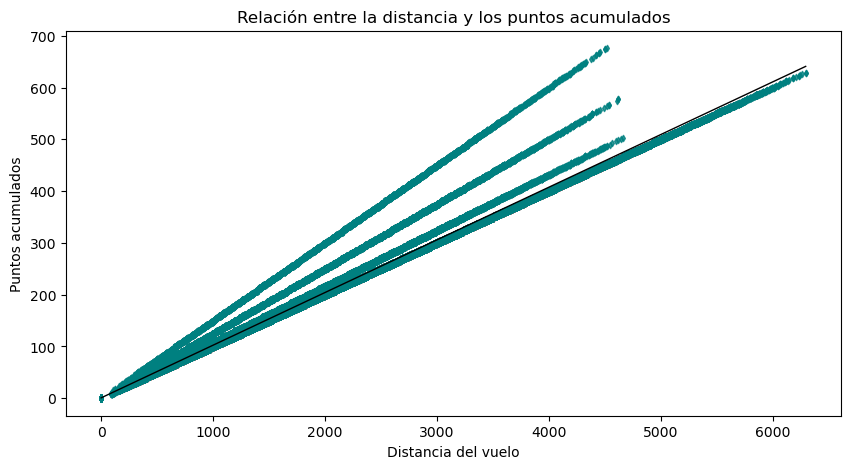

In [48]:
# Necesito las variables: Distance, Points Accumulated
# 2 variables y ambas numéricas -> Scatterplot o regplot: para ver la relación. En este caso usaré un regplot para observar la línea de tendencia

plt.figure(figsize=(10,5))

sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_completo, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # color y grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 10} # color y tamaño de los puntos del scaterplot
            )

plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia y los puntos acumulados")
plt.show() # para que se quite el texto de arriba de la gráfica

En este caso observamos un reglot con una línea ascendente de tendencia, organizando la distancia de los vuelos en el eje x y los puntos acumulados en el eje y.
- Encontramos relación entre las variables, directa, ambas van en ascenso: A medida que los vuelos tienen mayor distancia, se le otorga más puntos al cliente. Muchas aerolíneas ofrecen programas como "viajero frecuente" donde se otorgan puntos/millas en función a la distancia de los vuelos.
- También apreciamos algunas líneas paralelas: probablemente se debe a que según la categoría de cliente, se le otorgan los puntos de diferentes formas
- No se aprecian outliners (no se le otorgaría un gran número de puntos a vuelos de poca distancia)


-----------

 3. ¿Cuál es la distribución de los clientes por provincia o estado?
 

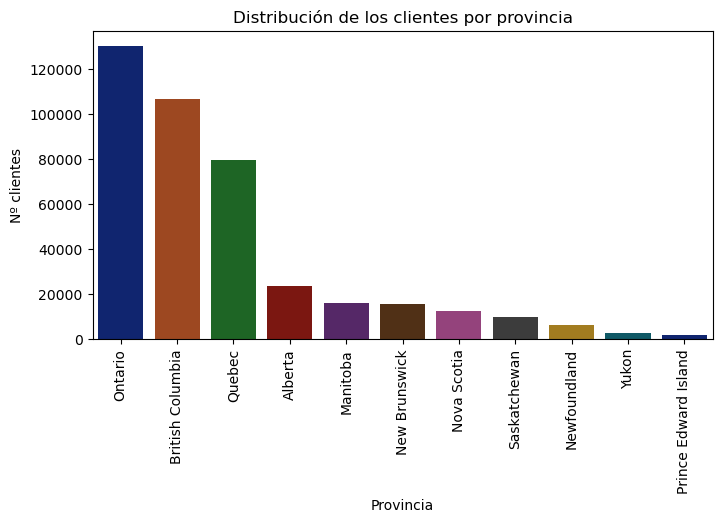

In [66]:
# Necesito la variable: Province
# 2 una categórica y una numérica (Clientes) -> Countplot (Utilizado para contar y comparar cuántas veces aparece cada categoría en una variable categórica)

plt.figure(figsize=(8,4))

sns.countplot(x = "Province", 
              data = df_completo,
              palette = "dark", 
              order=df_completo['Province'].value_counts().index)

plt.xticks(rotation = 90) #para que se lean mejor las etiquetas del eje x
plt.title("Distribución de los clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Nº clientes");

Nuevamente obtenemos un gráfico de barras, ideal para comprobar la distribución de forma clara, con la provincia en el eje X y el número de clientes en el eje y.
- Hay una relación entre el número de clientes por provincia y el número de población en cada provincia.
- Como observamos en nuestra exploración de datos inicial, Ontario encabeza como la provincia con más clientes. Tiene sentido ya que abarca el 40% de la población total de Canadá, con cerca de 125000 clientes registrados.
- Las provincias con menor número de clientes también cuentan con bajos índices de población, la Isla del Príncipe Eduardo (0.45% de población) y Yukon (0.11% de población).

Como conclusión podemos ver que a mayor número de población por provincia, mayor número de clientes tenemos registrados. Para las provincias intermedias en nuestro registro, se podrían realizar campañas de marketing para captar clientes.

--------------

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?